In [39]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [2]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
# rc(run command)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [76]:
df_team = pd.read_csv('data/kbo_team_rank.csv')

df_team

,순위,팀명,경기,승,패,무,승률,패배율
0,1,LG,19,16,3,0,0.842,0.158
1,2,KT,19,10,8,1,0.556,0.421
2,3,SSG,17,9,8,0,0.529,0.471
3,4,삼성,20,10,10,0,0.500,0.500
4,4,롯데,21,10,10,1,0.500,0.476
5,6,한화,21,10,11,0,0.476,0.524
6,7,NC,16,7,9,0,0.438,0.562
7,8,KIA,19,8,11,0,0.421,0.579
8,8,두산,19,8,11,0,0.421,0.579
9,10,키움,21,7,14,0,0.333,0.667


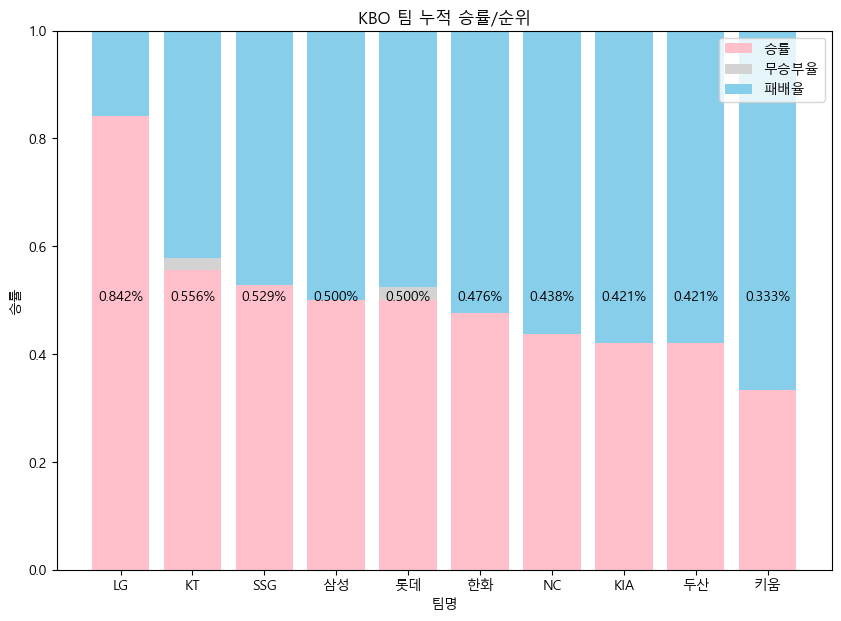

In [83]:
plt.figure(figsize=(10, 7))

x = range(len(df_team))
draw_rate = 1-df_team['승률']-df_team['패배율']
df_team['무승부율']=draw_rate

plt.bar(x, df_team['승률'], label='승률', color='pink')
plt.bar(x, df_team['무승부율'], bottom=df_team['승률'], label='무승부율', color='lightgray')
plt.bar(x, df_team['패배율'], bottom=df_team['승률'] + df_team['무승부율'], label='패배율', color='skyblue')

plt.xticks(x, df_team['팀명'])

# 값 표시
for i, rate in enumerate(df_team['승률']):
    total = df_team.loc[i, ['승률', '무승부율', '패배율']].sum()
    plt.text(i, total - 0.5, f'{rate:.3f}%', ha='center', fontsize=10, color='black')

# plot 특징 수정
plt.legend(loc='upper right')
plt.ylim(0, 1.0)
# plt.yticks(np.arange(0, 28, 3))
plt.xlabel('팀명')
plt.ylabel('승률')
plt.title('KBO 팀 누적 승률/순위')
plt.show()